In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv(r"C:\Users\USER\Downloads\new_dff_total.csv")

In [11]:
df.head()

,X.1,X,Status.text,State,retweet_count,reply_count,like_count,quote_count,Buzz,Day,...,Clout,Cognition,emotion,emo_pos,emo_neg,Positive,Negative,Total_Sentiment,Total_sentiment1,Sentiment_Type
0,0,1,"World Tourism Day, Tourism for inclusive grow...",Assam,0,1,1,0,3,weekday,...,40.06,3.23,3.23,0.0,3.23,1,-2,1,-1,Negative
1,1,2,In tune with this year's World Tourism Day the...,Assam,0,1,1,0,3,weekday,...,40.06,0.00,2.27,0.0,2.27,1,-1,0,0,Neutral
2,2,3,Kakoijana reserved forest is loca near Abhayap...,Assam,0,1,1,0,3,weekend,...,40.06,0.00,2.78,0.0,2.78,1,-2,1,-1,Negative
3,3,4,"In your next visit to Kaziranga National Park,...",Assam,0,1,3,0,5,weekday,...,90.60,4.17,2.08,0.0,2.08,1,-1,0,0,Neutral
4,4,5,Ketetong is a Singpho tribal village located o...,Assam,0,1,1,0,3,weekday,...,57.11,5.71,2.86,0.0,2.86,1,-1,0,0,Neutral


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23006 entries, 0 to 23005
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X.1               23006 non-null  int64  
 1   X                 23006 non-null  int64  
 2   Status.text       23006 non-null  object 
 3   State             23006 non-null  object 
 4   retweet_count     23006 non-null  int64  
 5   reply_count       23006 non-null  int64  
 6   like_count        23006 non-null  int64  
 7   quote_count       23006 non-null  int64  
 8   Buzz              23006 non-null  int64  
 9   Day               23006 non-null  object 
 10  Time              23006 non-null  object 
 11  Followers         23006 non-null  int64  
 12  Vividness         23006 non-null  object 
 13  WC                23006 non-null  int64  
 14  Clout             23006 non-null  float64
 15  Cognition         23006 non-null  float64
 16  emotion           23006 non-null  float6

In [13]:
df.columns

Index(['X.1', 'X', 'Status.text', 'State', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'Buzz', 'Day', 'Time', 'Followers',
       'Vividness', 'WC', 'Clout', 'Cognition', 'emotion', 'emo_pos',
       'emo_neg', 'Positive', 'Negative', 'Total_Sentiment',
       'Total_sentiment1', 'Sentiment_Type'],
      dtype='object')

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score



In [15]:
import random

In [16]:
df.describe().transpose().style.background_gradient(cmap='tab20c')    

,count,mean,std,min,25%,50%,75%,max
X.1,23006.000000,11502.500000,6641.404482,0.000000,5751.250000,11502.500000,17253.750000,23005.000000
X,23006.000000,828.641833,776.896316,1.000000,260.000000,592.000000,1135.000000,3685.000000
retweet_count,23006.000000,18.857168,61.300045,0.000000,4.000000,9.000000,21.000000,3519.000000
reply_count,23006.000000,3.595062,32.241142,0.000000,0.000000,1.000000,3.000000,4580.000000
like_count,23006.000000,139.501304,537.268359,0.000000,27.000000,63.000000,137.000000,38244.000000
quote_count,23006.000000,1.468660,17.794031,0.000000,0.000000,1.000000,1.000000,2546.000000
Buzz,23006.000000,203.262931,730.136030,0.000000,42.000000,96.000000,208.000000,48864.000000
Followers,23006.000000,508226.524515,596031.456792,5164.000000,91325.000000,190197.000000,650771.000000,1972674.000000
WC,23006.000000,38.723420,12.588226,2.000000,31.000000,40.000000,46.000000,205.000000
Clout,23006.000000,63.853962,25.410441,1.000000,40.060000,65.160000,88.150000,99.000000


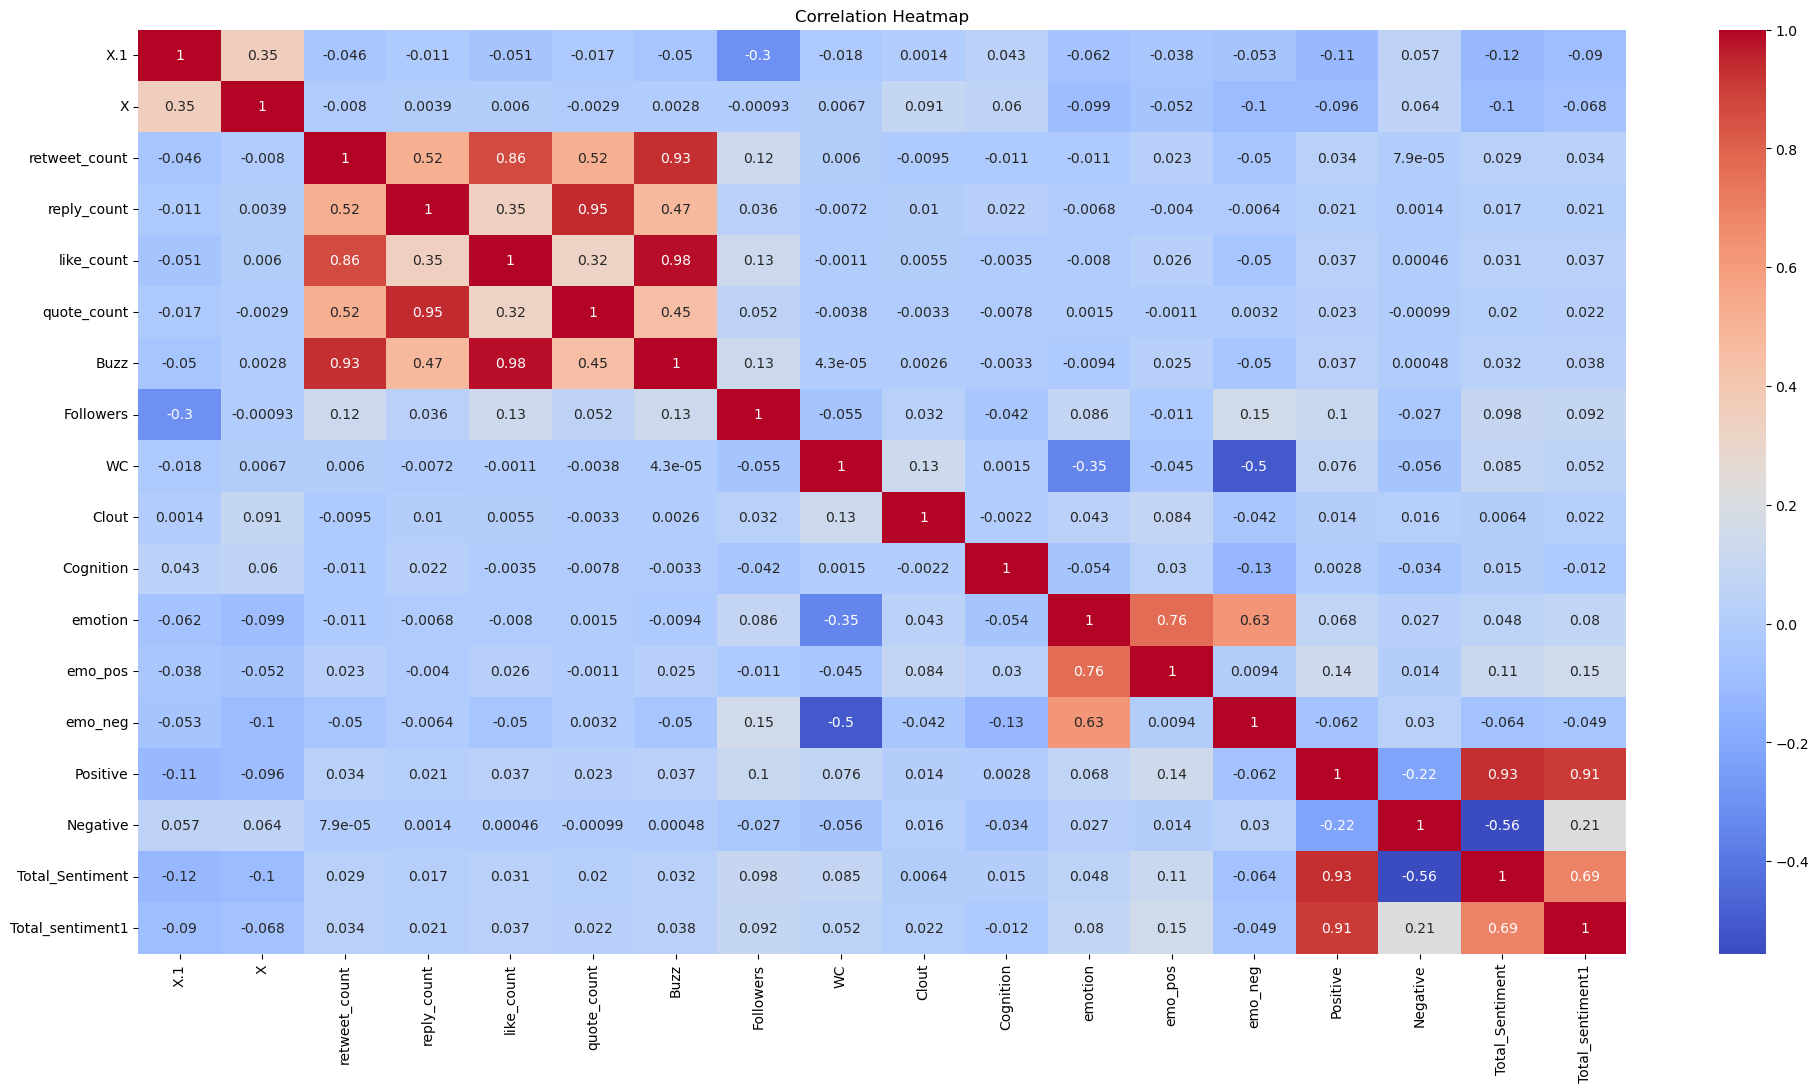

In [70]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [72]:
correlation_matrix

,X.1,X,retweet_count,reply_count,like_count,quote_count,Buzz,Followers,WC,Clout,Cognition,emotion,emo_pos,emo_neg,Positive,Negative,Total_Sentiment,Total_sentiment1
X.1,1.000000,0.349934,-0.046391,-0.011322,-0.051287,-0.017462,-0.050423,-0.301810,-0.017512,0.001423,0.043319,-0.062309,-0.037546,-0.053193,-0.114781,0.056620,-0.118674,-0.090483
X,0.349934,1.000000,-0.007988,0.003939,0.006028,-0.002925,0.002772,-0.000935,0.006719,0.091207,0.060096,-0.099028,-0.052387,-0.104522,-0.095542,0.063581,-0.104839,-0.068199
retweet_count,-0.046391,-0.007988,1.000000,0.520631,0.860834,0.522480,0.931293,0.124235,0.005972,-0.009469,-0.010678,-0.011437,0.023328,-0.049661,0.033704,0.000079,0.028698,0.033797
reply_count,-0.011322,0.003939,0.520631,1.000000,0.346512,0.945248,0.474427,0.036236,-0.007200,0.010433,0.022184,-0.006805,-0.003998,-0.006398,0.020618,0.001435,0.017045,0.021275
like_count,-0.051287,0.006028,0.860834,0.346512,1.000000,0.322872,0.983268,0.125749,-0.001122,0.005517,-0.003540,-0.008025,0.026376,-0.049745,0.036925,0.000457,0.031303,0.037186
quote_count,-0.017462,-0.002925,0.522480,0.945248,0.322872,1.000000,0.452662,0.052208,-0.003783,-0.003260,-0.007796,0.001494,-0.001075,0.003199,0.022705,-0.000992,0.019717,0.022315
Buzz,-0.050423,0.002772,0.931293,0.474427,0.983268,0.452662,1.000000,0.127023,0.000043,0.002596,-0.003335,-0.009387,0.024931,-0.049678,0.037481,0.000483,0.031768,0.037755
Followers,-0.301810,-0.000935,0.124235,0.036236,0.125749,0.052208,0.127023,1.000000,-0.055465,0.032188,-0.042192,0.086490,-0.010668,0.153324,0.103170,-0.026944,0.097853,0.091691
WC,-0.017512,0.006719,0.005972,-0.007200,-0.001122,-0.003783,0.000043,-0.055465,1.000000,0.132215,0.001473,-0.345127,-0.044913,-0.501167,0.075825,-0.056353,0.085373,0.051575
Clout,0.001423,0.091207,-0.009469,0.010433,0.005517,-0.003260,0.002596,0.032188,0.132215,1.000000,-0.002246,0.042776,0.083714,-0.041636,0.014475,0.016181,0.006381,0.021501


# Machine Learning Algorithms

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23006 entries, 0 to 23005
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X.1               23006 non-null  int64  
 1   X                 23006 non-null  int64  
 2   Status.text       23006 non-null  object 
 3   State             23006 non-null  object 
 4   retweet_count     23006 non-null  int64  
 5   reply_count       23006 non-null  int64  
 6   like_count        23006 non-null  int64  
 7   quote_count       23006 non-null  int64  
 8   Buzz              23006 non-null  int64  
 9   Day               23006 non-null  object 
 10  Time              23006 non-null  object 
 11  Followers         23006 non-null  int64  
 12  Vividness         23006 non-null  object 
 13  WC                23006 non-null  int64  
 14  Clout             23006 non-null  float64
 15  Cognition         23006 non-null  float64
 16  emotion           23006 non-null  float6

In [18]:
# Engagement ratio feature
df['engagement_ratio'] = (df['retweet_count'] + df['reply_count'] + df['like_count']) / df['Followers']
df['engagement_ratio'].head()

0    0.000387
1    0.000387
2    0.000387
3    0.000775
4    0.000387
Name: engagement_ratio, dtype: float64

In [19]:
df.columns

Index(['X.1', 'X', 'Status.text', 'State', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'Buzz', 'Day', 'Time', 'Followers',
       'Vividness', 'WC', 'Clout', 'Cognition', 'emotion', 'emo_pos',
       'emo_neg', 'Positive', 'Negative', 'Total_Sentiment',
       'Total_sentiment1', 'Sentiment_Type', 'engagement_ratio'],
      dtype='object')

In [20]:
categorical_columns = df[['Vividness','Day','State']]
categorical_columns

,Vividness,Day,State
0,photo,weekday,Assam
1,photo,weekday,Assam
2,photo,weekend,Assam
3,photo,weekday,Assam
4,photo,weekday,Assam
...,...,...,...
23001,photo,weekday,Assam
23002,photo,weekday,Assam
23003,photo,weekend,Assam
23004,photo,weekend,Assam


In [21]:
columns_to_drop = ['Vividness','Day','State','Status.text','Time']

numerical_column=df.drop(columns=columns_to_drop)
numerical_column

,X.1,X,retweet_count,reply_count,like_count,quote_count,Buzz,Followers,WC,Clout,Cognition,emotion,emo_pos,emo_neg,Positive,Negative,Total_Sentiment,Total_sentiment1,Sentiment_Type,engagement_ratio
0,0,1,0,1,1,0,3,5164,31,40.06,3.23,3.23,0.00,3.23,1,-2,1,-1,Negative,0.000387
1,1,2,0,1,1,0,3,5164,44,40.06,0.00,2.27,0.00,2.27,1,-1,0,0,Neutral,0.000387
2,2,3,0,1,1,0,3,5164,36,40.06,0.00,2.78,0.00,2.78,1,-2,1,-1,Negative,0.000387
3,3,4,0,1,3,0,5,5164,48,90.60,4.17,2.08,0.00,2.08,1,-1,0,0,Neutral,0.000775
4,4,5,0,1,1,0,3,5164,35,57.11,5.71,2.86,0.00,2.86,1,-1,0,0,Neutral,0.000387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23001,23001,118,4,0,14,1,26,5164,12,98.75,8.33,16.67,8.33,8.33,1,-1,0,0,Neutral,0.003486
23002,23002,119,3,1,38,1,49,5164,54,72.07,1.85,3.70,0.00,3.70,4,-1,3,3,Positive,0.008133
23003,23003,120,9,1,33,1,62,5164,50,40.06,4.00,8.00,6.00,2.00,1,-1,0,0,Neutral,0.008327
23004,23004,121,1,3,15,0,24,5164,28,91.33,14.29,14.29,10.71,3.57,1,-1,0,0,Neutral,0.003679


## PCA(principal component analysis)

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
numerical_columns = ['retweet_count','reply_count','like_count','quote_count','Buzz','Followers','WC','Clout','Cognition','emotion','emo_pos','emo_neg','Positive','Negative']
categorical_columns = ['Vividness','Day','State']

In [24]:
numerical_columns

['retweet_count',
 'reply_count',
 'like_count',
 'quote_count',
 'Buzz',
 'Followers',
 'WC',
 'Clout',
 'Cognition',
 'emotion',
 'emo_pos',
 'emo_neg',
 'Positive',
 'Negative']

In [25]:
columns_to_drop = ['X.1', 'X','Total_Sentiment','Total_sentiment1','Positive','Negative','Sentiment_Type']

numerical_column1=numerical_column.drop(columns=columns_to_drop)
numerical_column1

,retweet_count,reply_count,like_count,quote_count,Buzz,Followers,WC,Clout,Cognition,emotion,emo_pos,emo_neg,engagement_ratio
0,0,1,1,0,3,5164,31,40.06,3.23,3.23,0.00,3.23,0.000387
1,0,1,1,0,3,5164,44,40.06,0.00,2.27,0.00,2.27,0.000387
2,0,1,1,0,3,5164,36,40.06,0.00,2.78,0.00,2.78,0.000387
3,0,1,3,0,5,5164,48,90.60,4.17,2.08,0.00,2.08,0.000775
4,0,1,1,0,3,5164,35,57.11,5.71,2.86,0.00,2.86,0.000387
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23001,4,0,14,1,26,5164,12,98.75,8.33,16.67,8.33,8.33,0.003486
23002,3,1,38,1,49,5164,54,72.07,1.85,3.70,0.00,3.70,0.008133
23003,9,1,33,1,62,5164,50,40.06,4.00,8.00,6.00,2.00,0.008327
23004,1,3,15,0,24,5164,28,91.33,14.29,14.29,10.71,3.57,0.003679


In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_column1)

In [27]:
pca = PCA(n_components=9)  # Specify the number of components you want to retain
pca.fit(scaled_data)


PCA(n_components=9)

In [28]:
pca_data = pca.transform(scaled_data)

In [29]:
pca_data

array([[-0.55737495, -0.34051162,  0.56663866, ..., -0.33941275,
        -0.60532206, -0.22496289],
       [-0.53262826, -1.22103522,  0.28957607, ..., -0.96426589,
        -0.54906974, -0.02045881],
       [-0.54492778, -0.68905317,  0.48243184, ..., -0.73477389,
        -0.64651497, -0.25509214],
       ...,
       [ 0.2861821 ,  0.93307074, -2.81730876, ..., -1.33829081,
         1.94016647, -0.13600913],
       [-0.21520175,  4.39094838, -3.27022953, ...,  0.40769555,
         0.54992848, -0.64497487],
       [-0.23328378,  0.98374962,  0.07646097, ...,  1.64489618,
         0.18084277, -0.53111235]])

In [30]:
print("Principal Components:", pca.components_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Principal Components: [[ 4.85269764e-01  3.75913720e-01  4.52606777e-01  3.69899442e-01
   4.88473703e-01  6.24867218e-02  3.47491699e-03  1.11157102e-05
  -2.89158756e-03 -7.26980118e-03  1.23308830e-02 -2.83263292e-02
   1.94896823e-01]
 [ 5.49125340e-04  8.92755206e-03  1.21960119e-03  1.55209429e-02
   1.82418925e-03  1.27994518e-01 -4.02163551e-01 -7.08776347e-03
  -7.36311880e-02  6.29029976e-01  4.02653935e-01  5.07867411e-01
  -1.86055415e-02]
 [-1.05467544e-01  4.09290725e-01 -2.36634430e-01  4.24659720e-01
  -1.64544252e-01  2.34292441e-01 -2.30278173e-01 -1.61412491e-01
  -6.45652237e-02 -1.67309732e-01 -4.21938733e-01  2.55730177e-01
  -3.85207409e-01]
 [-1.08441022e-01  3.58458613e-01 -2.23597359e-01  3.58356326e-01
  -1.60189157e-01 -1.18748059e-01  3.47521391e-01  3.57593181e-01
   1.91097847e-01  1.81837125e-01  4.54553859e-01 -2.71414480e-01
  -2.07506882e-01]
 [-7.95442156e-02  1.87140440e-01 -1.62198886e-01  1.79774450e-01
  -1.22861048e-01 -7.09475235e-01 -2.0397626

In [31]:
df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9',])

In [32]:
df1= df["Sentiment_Type"]

In [33]:
correlation_matrix = df_pca.corr()
correlation_matrix

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
PCA1,1.000000e+00,-5.062373e-16,8.930917e-16,4.434493e-16,-9.350524e-16,-2.063519e-16,1.110252e-16,-6.612157e-16,-1.011270e-16
PCA2,-5.062373e-16,1.000000e+00,8.178291e-16,9.328069e-16,-6.598819e-17,-5.757909e-16,-2.056276e-16,5.441385e-16,-1.977418e-16
PCA3,8.930917e-16,8.178291e-16,1.000000e+00,3.733008e-16,-1.092454e-16,1.150152e-15,7.598484e-17,-1.390626e-17,-2.806231e-16
PCA4,4.434493e-16,9.328069e-16,3.733008e-16,1.000000e+00,-1.621503e-15,-7.389181e-16,-4.816802e-18,4.490047e-16,1.053798e-16
PCA5,-9.350524e-16,-6.598819e-17,-1.092454e-16,-1.621503e-15,1.000000e+00,7.566028e-16,-3.800116e-16,-1.067108e-15,-5.042265e-16
PCA6,-2.063519e-16,-5.757909e-16,1.150152e-15,-7.389181e-16,7.566028e-16,1.000000e+00,-5.057046e-16,-2.210556e-16,3.567936e-16
PCA7,1.110252e-16,-2.056276e-16,7.598484e-17,-4.816802e-18,-3.800116e-16,-5.057046e-16,1.000000e+00,-8.435566e-16,-2.341003e-16
PCA8,-6.612157e-16,5.441385e-16,-1.390626e-17,4.490047e-16,-1.067108e-15,-2.210556e-16,-8.435566e-16,1.000000e+00,-7.535700e-17
PCA9,-1.011270e-16,-1.977418e-16,-2.806231e-16,1.053798e-16,-5.042265e-16,3.567936e-16,-2.341003e-16,-7.535700e-17,1.000000e+00


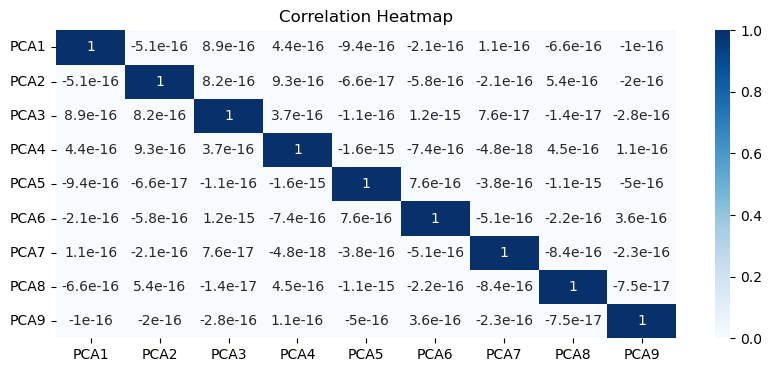

In [34]:
plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
df_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-0.557375,-0.340512,0.566639,-0.718903,1.032608,0.094436,-0.339413,-0.605322,-0.224963
1,-0.532628,-1.221035,0.289576,-0.411578,0.722691,0.875938,-0.964266,-0.549070,-0.020459
2,-0.544928,-0.689053,0.482432,-0.680981,0.861126,0.801798,-0.734774,-0.646515,-0.255092
3,-0.496509,-1.539954,-0.246932,0.578454,0.047774,0.657757,0.798475,-0.340569,0.055129
4,-0.550603,-0.715872,0.314334,-0.223556,0.762114,-0.193981,0.231819,-0.511537,-0.134947
...,...,...,...,...,...,...,...,...,...
23001,-0.323375,6.543727,-1.840680,1.505035,1.209764,-0.248180,1.516319,0.197163,0.311811
23002,0.167148,-0.864096,-1.227429,-0.410093,1.452861,1.671736,0.683738,1.893540,0.864519
23003,0.286182,0.933071,-2.817309,1.025773,2.085496,0.574538,-1.338291,1.940166,-0.136009
23004,-0.215202,4.390948,-3.270230,3.262397,1.189237,-1.657636,0.407696,0.549928,-0.644975


In [36]:
concatenated_df = pd.concat([df_pca,df1 ], axis=1)
concatenated_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,Sentiment_Type
0,-0.557375,-0.340512,0.566639,-0.718903,1.032608,0.094436,-0.339413,-0.605322,-0.224963,Negative
1,-0.532628,-1.221035,0.289576,-0.411578,0.722691,0.875938,-0.964266,-0.549070,-0.020459,Neutral
2,-0.544928,-0.689053,0.482432,-0.680981,0.861126,0.801798,-0.734774,-0.646515,-0.255092,Negative
3,-0.496509,-1.539954,-0.246932,0.578454,0.047774,0.657757,0.798475,-0.340569,0.055129,Neutral
4,-0.550603,-0.715872,0.314334,-0.223556,0.762114,-0.193981,0.231819,-0.511537,-0.134947,Neutral
...,...,...,...,...,...,...,...,...,...,...
23001,-0.323375,6.543727,-1.840680,1.505035,1.209764,-0.248180,1.516319,0.197163,0.311811,Neutral
23002,0.167148,-0.864096,-1.227429,-0.410093,1.452861,1.671736,0.683738,1.893540,0.864519,Positive
23003,0.286182,0.933071,-2.817309,1.025773,2.085496,0.574538,-1.338291,1.940166,-0.136009,Neutral
23004,-0.215202,4.390948,-3.270230,3.262397,1.189237,-1.657636,0.407696,0.549928,-0.644975,Neutral


In [37]:
import pandas as pd

# Sample DataFrame
df = concatenated_df['Sentiment_Type']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df, prefix='Category')

# Concatenate one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Print the result
print("Original DataFrame:")
print(df)
print("\nOne-hot encoded DataFrame:")
print(df_encoded)


Original DataFrame:
0        Negative
1         Neutral
2        Negative
3         Neutral
4         Neutral
           ...   
23001     Neutral
23002    Positive
23003     Neutral
23004     Neutral
23005     Neutral
Name: Sentiment_Type, Length: 23006, dtype: object

One-hot encoded DataFrame:
      Sentiment_Type  Category_Negative  Category_Neutral  Category_Positive
0           Negative                  1                 0                  0
1            Neutral                  0                 1                  0
2           Negative                  1                 0                  0
3            Neutral                  0                 1                  0
4            Neutral                  0                 1                  0
...              ...                ...               ...                ...
23001        Neutral                  0                 1                  0
23002       Positive                  0                 0                  1
23003     

In [38]:
import pandas as pd

# Sample Series (Single column)
s =  concatenated_df['Sentiment_Type']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(s, prefix='Category')

# Concatenate one-hot encoded columns with the original Series
s_encoded = pd.concat([s, one_hot_encoded], axis=1)

# Print the result
print("Original Series:")
print(s)
print("\nOne-hot encoded DataFrame:")
print(s_encoded)


Original Series:
0        Negative
1         Neutral
2        Negative
3         Neutral
4         Neutral
           ...   
23001     Neutral
23002    Positive
23003     Neutral
23004     Neutral
23005     Neutral
Name: Sentiment_Type, Length: 23006, dtype: object

One-hot encoded DataFrame:
      Sentiment_Type  Category_Negative  Category_Neutral  Category_Positive
0           Negative                  1                 0                  0
1            Neutral                  0                 1                  0
2           Negative                  1                 0                  0
3            Neutral                  0                 1                  0
4            Neutral                  0                 1                  0
...              ...                ...               ...                ...
23001        Neutral                  0                 1                  0
23002       Positive                  0                 0                  1
23003        

In [39]:
s

0        Negative
1         Neutral
2        Negative
3         Neutral
4         Neutral
           ...   
23001     Neutral
23002    Positive
23003     Neutral
23004     Neutral
23005     Neutral
Name: Sentiment_Type, Length: 23006, dtype: object

In [40]:
dd=pd.Series(s)
mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
s_mapped = dd.map(mapping)

In [41]:
s_mapped

0       -1
1        0
2       -1
3        0
4        0
        ..
23001    0
23002    1
23003    0
23004    0
23005    0
Name: Sentiment_Type, Length: 23006, dtype: int64

In [42]:
cleaned_data = pd.concat([df_pca,s_mapped], axis=1)

In [43]:
cleaned_data

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,Sentiment_Type
0,-0.557375,-0.340512,0.566639,-0.718903,1.032608,0.094436,-0.339413,-0.605322,-0.224963,-1
1,-0.532628,-1.221035,0.289576,-0.411578,0.722691,0.875938,-0.964266,-0.549070,-0.020459,0
2,-0.544928,-0.689053,0.482432,-0.680981,0.861126,0.801798,-0.734774,-0.646515,-0.255092,-1
3,-0.496509,-1.539954,-0.246932,0.578454,0.047774,0.657757,0.798475,-0.340569,0.055129,0
4,-0.550603,-0.715872,0.314334,-0.223556,0.762114,-0.193981,0.231819,-0.511537,-0.134947,0
...,...,...,...,...,...,...,...,...,...,...
23001,-0.323375,6.543727,-1.840680,1.505035,1.209764,-0.248180,1.516319,0.197163,0.311811,0
23002,0.167148,-0.864096,-1.227429,-0.410093,1.452861,1.671736,0.683738,1.893540,0.864519,1
23003,0.286182,0.933071,-2.817309,1.025773,2.085496,0.574538,-1.338291,1.940166,-0.136009,0
23004,-0.215202,4.390948,-3.270230,3.262397,1.189237,-1.657636,0.407696,0.549928,-0.644975,0


In [44]:
a=[0.28419813, 0.17214201, 0.10619018, 0.10002927, 0.08928461, 0.07789951 ,0.06823332, 0.0482505 , 0.03905827]
sum(a)

0.9852858

In [45]:
scaled_data

array([[-0.30762747, -0.0804909 , -0.25779354, ..., -0.54362858,
        -0.01711395, -0.20428234],
       [-0.30762747, -0.0804909 , -0.25779354, ..., -0.54362858,
        -0.59520704, -0.20428234],
       [-0.30762747, -0.0804909 , -0.25779354, ..., -0.54362858,
        -0.28809508, -0.20428234],
       ...,
       [-0.16080546, -0.0804909 , -0.1982317 , ...,  2.44425411,
        -0.75779572,  3.05668996],
       [-0.29131391, -0.01845701, -0.23173524, ...,  4.78974203,
         0.18762735,  1.14782813],
       [-0.2586868 , -0.04947396, -0.22987393, ..., -0.54362858,
         1.04874518,  1.30689995]])

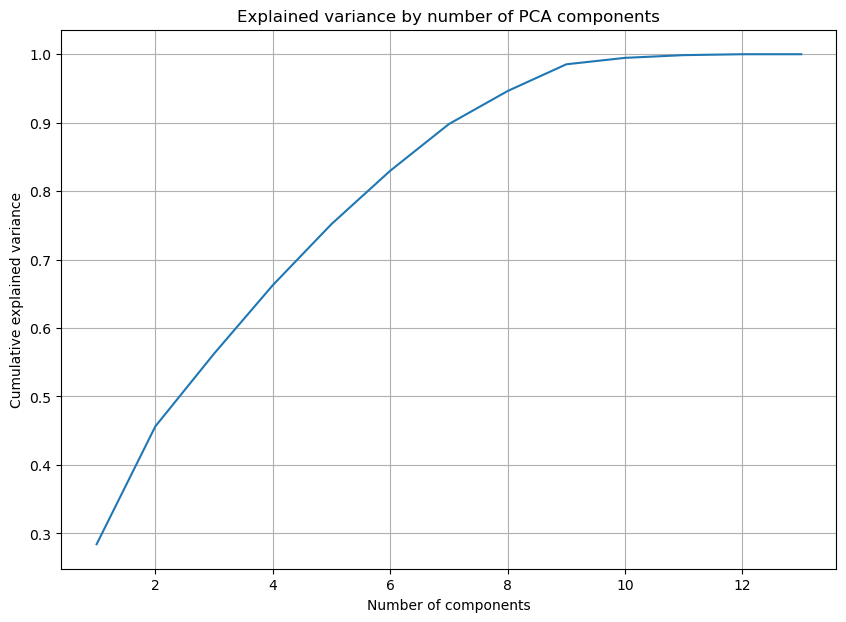

In [166]:
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by number of PCA components')
plt.grid(True)
plt.savefig('pca.png')
plt.show()

In [50]:
features = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9']
X = cleaned_data[features]  # Extract features from your DataFrame
y = cleaned_data['Sentiment_Type']# Replace 'target' with the name of your target variable column

### Visual Representation of Sentiment Types

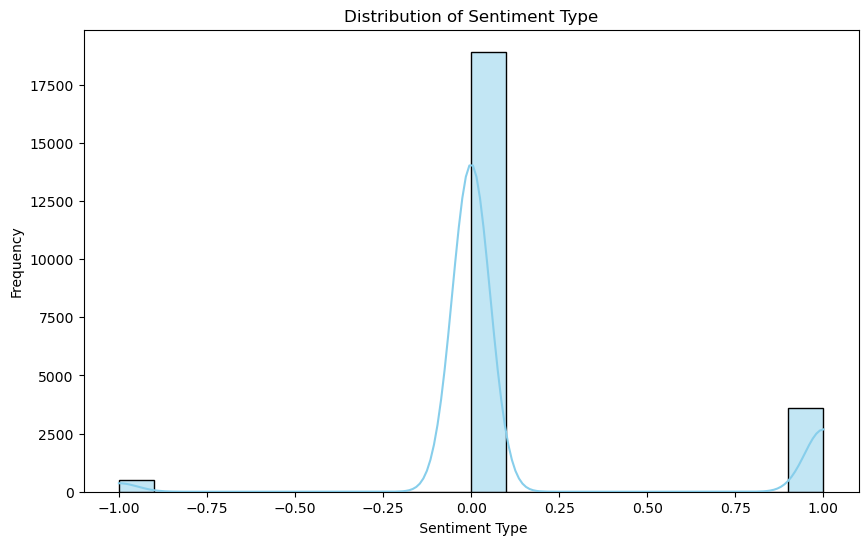

In [51]:
# Distribution of Total Sentiment
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Type')
plt.xlabel(' Sentiment Type')
plt.ylabel('Frequency')
plt.show()

# Machine Learning Models

 ### Logistic Regression Fitting   

In [53]:
cleaned_data.columns

Index(['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9',
       'Sentiment_Type'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

# Step 1: Prepare Data
# Assuming 'X' contains your features and 'y' contains your target variable
features = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9']
X = cleaned_data[features]  # Extract features from your DataFrame
y = cleaned_data['Sentiment_Type']# Replace 'target' with the name of your target variable column

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)

# Step 3: Fit Multinomial Logistic Regression
# Set multi_class parameter to 'multinomial' or 'auto' for multinomial logistic regression
logreg = LogisticRegression(multi_class='multinomial', max_iter=100)
logreg.fit(X_train, y_train)

# Step 4: Evaluate Model
# Predict on the test set
y_pred_logis = logreg.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logis))

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       162
           0       0.82      1.00      0.90      5671
           1       0.47      0.01      0.01      1069

    accuracy                           0.82      6902
   macro avg       0.43      0.34      0.30      6902
weighted avg       0.75      0.82      0.74      6902



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_logis))

Confusion Matrix:
[[   0  162    0]
 [   0 5663    8]
 [   0 1062    7]]


In [47]:
y_pred_logis

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## SVM(Support Vector Machines)

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

#### kernel is Radial Basis Function(rbf)

In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Scale the features (optional but recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM model
svm_model = SVC(kernel='rbf')  # You can choose different kernels like 'rbf', 'poly', etc.

# Fit the SVM model to the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_svm)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1775315080399826


In [76]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Confusion Matrix:
[[   0   94    0]
 [   0 3782    2]
 [   0  721    3]]


In [77]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        94
           0       0.82      1.00      0.90      3784
           1       0.60      0.00      0.01       724

    accuracy                           0.82      4602
   macro avg       0.47      0.33      0.30      4602
weighted avg       0.77      0.82      0.74      4602



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred_tree=model.predict(X_test)
y_pred_tree

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
confusion_matrix(y_pred_tree,y_test)

array([[   5,   69,   17],
       [  80, 3113,  475],
       [  16,  613,  214]], dtype=int64)

In [53]:
print(classification_report(y_pred_tree,y_test))

              precision    recall  f1-score   support

          -1       0.05      0.05      0.05        91
           0       0.82      0.85      0.83      3668
           1       0.30      0.25      0.28       843

    accuracy                           0.72      4602
   macro avg       0.39      0.39      0.39      4602
weighted avg       0.71      0.72      0.72      4602



In [196]:
model.feature_importances_

array([0.1559522 , 0.11062906, 0.10179093, 0.16579915, 0.09432654,
       0.10488574, 0.07689718, 0.13357552, 0.05614368])

In [54]:
from sklearn.tree import plot_tree

In [58]:
def report_model(mod):
    mod_pred = mod.predict(X_test)
    
    print('\n')
    print(classification_report(y_test,mod_pred))
    print('\n')
    plt.figure(figsize=(12,6))
    plot_tree(mod, feature_names=list(X.columns));

In [59]:
mod = DecisionTreeClassifier(max_depth=2)
mod.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)



              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       101
           0       0.82      1.00      0.90      3795
           1       0.00      0.00      0.00       706

    accuracy                           0.82      4602
   macro avg       0.27      0.33      0.30      4602
weighted avg       0.68      0.82      0.75      4602





C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


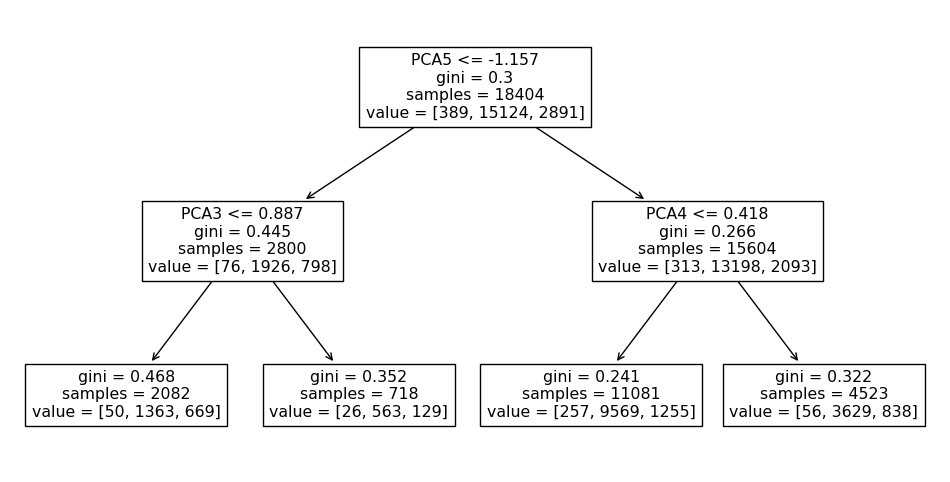

In [60]:
report_model(mod)

In [61]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=4)
max_leaf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=4)



              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       101
           0       0.82      1.00      0.90      3795
           1       0.00      0.00      0.00       706

    accuracy                           0.82      4602
   macro avg       0.27      0.33      0.30      4602
weighted avg       0.68      0.82      0.75      4602





C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


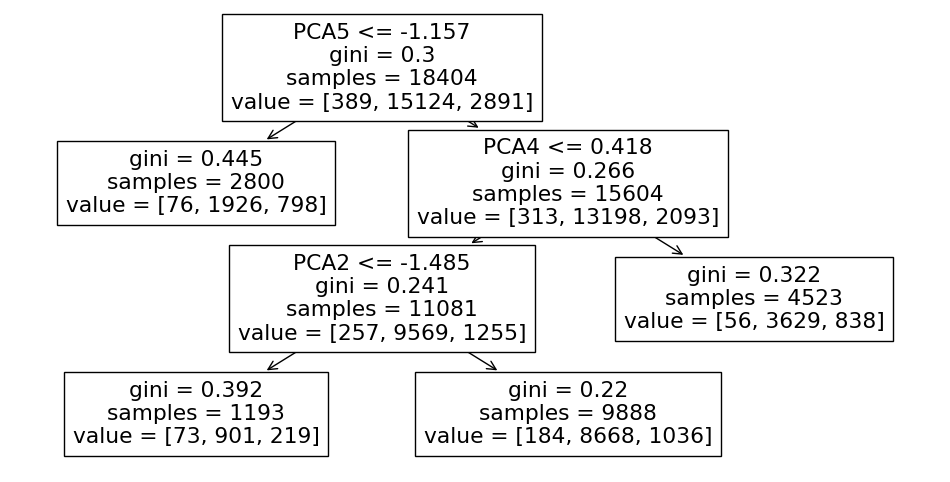

In [62]:
report_model(max_leaf_tree)

### Random Forest 

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=101, max_features="sqrt")
rf_model
rf_model.fit(X_train,y_train)
y_pred_r= rf_model.predict(X_test)
y_pred_r

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
confusion_matrix(y_test,y_pred_r)

array([[   1,   95,    5],
       [   1, 3693,  101],
       [   1,  615,   90]], dtype=int64)

In [67]:
print(classification_report(y_test,y_pred_r))

              precision    recall  f1-score   support

          -1       0.33      0.01      0.02       101
           0       0.84      0.97      0.90      3795
           1       0.46      0.13      0.20       706

    accuracy                           0.82      4602
   macro avg       0.54      0.37      0.37      4602
weighted avg       0.77      0.82      0.77      4602



In [68]:
test_error = []

for n in range(1,100):
    modrf = RandomForestClassifier(n_estimators=n)
    modrf.fit(X_train,y_train)
    test_preds = modrf.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

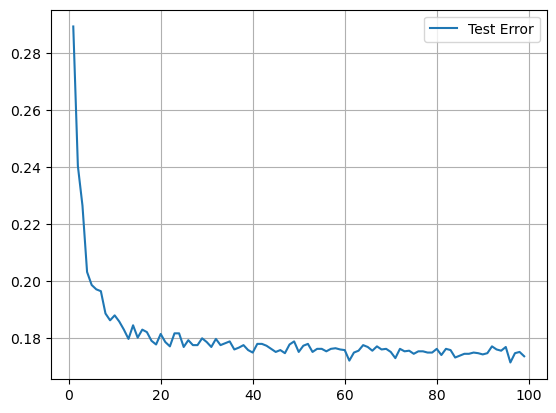

In [221]:
plt.plot(range(1,100),test_error,label='Test Error')
plt.legend()
plt.grid()
plt.show()

In [227]:
rf_model = RandomForestClassifier(n_estimators=96, random_state=101, max_features="sqrt")
rf_model
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,y_pred)

array([[   0,    0,    0,    4,    0,    0,    0,    0],
       [   0,    0,    0,   19,    0,    0,    0,    0],
       [   0,    0,    1,   72,    3,    2,    0,    0],
       [   0,    1,    5, 3740,   37,   12,    0,    0],
       [   0,    0,    1,  344,   35,    4,    0,    0],
       [   0,    0,    2,  240,    4,    7,    1,    0],
       [   0,    0,    0,   57,    0,    0,    9,    0],
       [   0,    0,    0,    2,    0,    0,    0,    0]], dtype=int64)

In [228]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         4
          -2       0.00      0.00      0.00        19
          -1       0.11      0.01      0.02        78
           0       0.84      0.99      0.90      3795
           1       0.44      0.09      0.15       384
           2       0.28      0.03      0.05       254
           3       0.90      0.14      0.24        66
           4       0.00      0.00      0.00         2

    accuracy                           0.82      4602
   macro avg       0.32      0.16      0.17      4602
weighted avg       0.76      0.82      0.76      4602



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [229]:
rf_model = RandomForestClassifier(n_estimators=77, random_state=101, max_features="sqrt")
rf_model
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,y_pred)

array([[   0,    0,    0,    4,    0,    0,    0,    0],
       [   0,    0,    0,   19,    0,    0,    0,    0],
       [   0,    0,    1,   72,    3,    2,    0,    0],
       [   0,    1,    5, 3742,   35,   12,    0,    0],
       [   0,    0,    1,  341,   39,    3,    0,    0],
       [   0,    0,    2,  239,    6,    6,    1,    0],
       [   0,    0,    0,   57,    0,    0,    9,    0],
       [   0,    0,    0,    2,    0,    0,    0,    0]], dtype=int64)

In [230]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         4
          -2       0.00      0.00      0.00        19
          -1       0.11      0.01      0.02        78
           0       0.84      0.99      0.90      3795
           1       0.47      0.10      0.17       384
           2       0.26      0.02      0.04       254
           3       0.90      0.14      0.24        66
           4       0.00      0.00      0.00         2

    accuracy                           0.83      4602
   macro avg       0.32      0.16      0.17      4602
weighted avg       0.76      0.83      0.77      4602



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the range of n_estimators values to search
param_grid = {'n_estimators': [40, 50, 60, 70, 80, 90, 100]}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameter value
best_n_estimators = grid_search.best_params_['n_estimators']
print("Best n_estimators:", best_n_estimators)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best n_estimators: 100


## Comparision

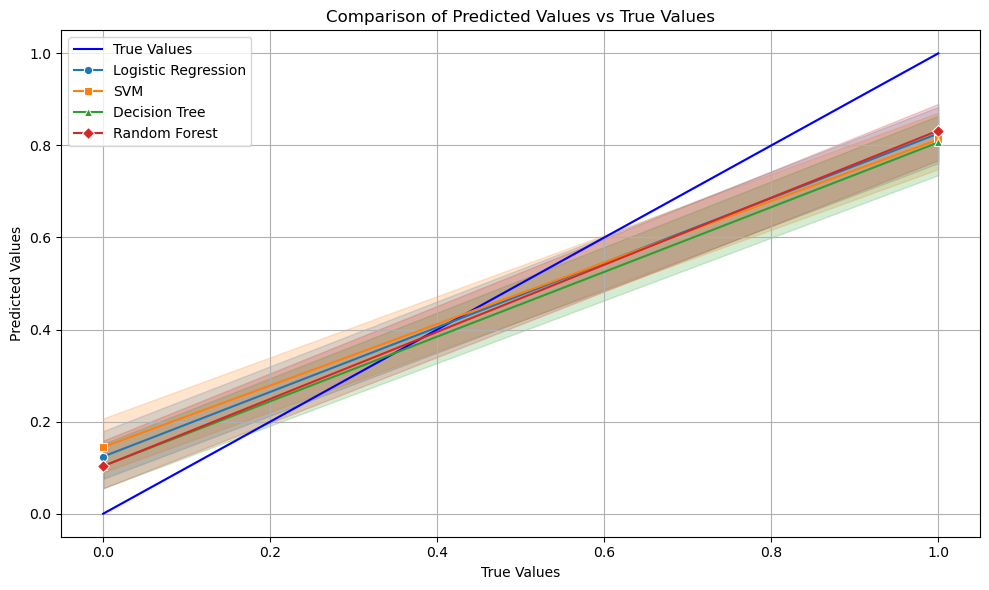

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Generate some synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train each model and get predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting true values for reference
sns.lineplot(x=y_test, y=y_test, label='True Values', color='blue', linestyle='-')

# Plotting predicted values for each model with markers
markers = ['o', 's', '^', 'D']
for i, (name, y_pred) in enumerate(predictions.items()):
    sns.lineplot(x=y_test, y=y_pred, label=name, marker=markers[i % len(markers)])

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted Values vs True Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
